In [ ]:
# The code was removed by Watson Studio for sharing.

In [296]:
df.head(5)

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [297]:
df.set_index('Unnamed: 0', inplace=True)


In [298]:
df.head(5)

,Very interested,Somewhat interested,Not interested
Unnamed: 0,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [299]:
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

df.head(5)

,Very interested,Somewhat interested,Not interested
Unnamed: 0,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [300]:
df['Very interested1']=df['Very interested']*100/2322
df['Somewhat interested1']=df['Somewhat interested']*100/2322
df['Not interested1']=df['Not interested']*100/2322
df.head(5)

,Very interested,Somewhat interested,Not interested,Very interested1,Somewhat interested1,Not interested1
Unnamed: 0,,,,,,
Data Analysis / Statistics,1688,444,60,72.695952,19.121447,2.583979
Machine Learning,1629,477,74,70.155039,20.542636,3.186908
Data Visualization,1340,734,102,57.708872,31.610680,4.392765
Big Data (Spark / Hadoop),1332,729,127,57.364341,31.395349,5.469423
Deep Learning,1263,770,136,54.392765,33.161068,5.857020


In [301]:
df.drop(['Very interested', 'Somewhat interested', 'Not interested'], axis=1, inplace=True)
df.head()

,Very interested1,Somewhat interested1,Not interested1
Unnamed: 0,,,
Data Analysis / Statistics,72.695952,19.121447,2.583979
Machine Learning,70.155039,20.542636,3.186908
Data Visualization,57.708872,31.610680,4.392765
Big Data (Spark / Hadoop),57.364341,31.395349,5.469423
Deep Learning,54.392765,33.161068,5.857020


In [302]:
df1=df.round(2) 
df1.head()

,Very interested1,Somewhat interested1,Not interested1
Unnamed: 0,,,
Data Analysis / Statistics,72.70,19.12,2.58
Machine Learning,70.16,20.54,3.19
Data Visualization,57.71,31.61,4.39
Big Data (Spark / Hadoop),57.36,31.40,5.47
Deep Learning,54.39,33.16,5.86


In [303]:
df1.dtypes


Very interested1        float64
Somewhat interested1    float64
Not interested1         float64
dtype: object

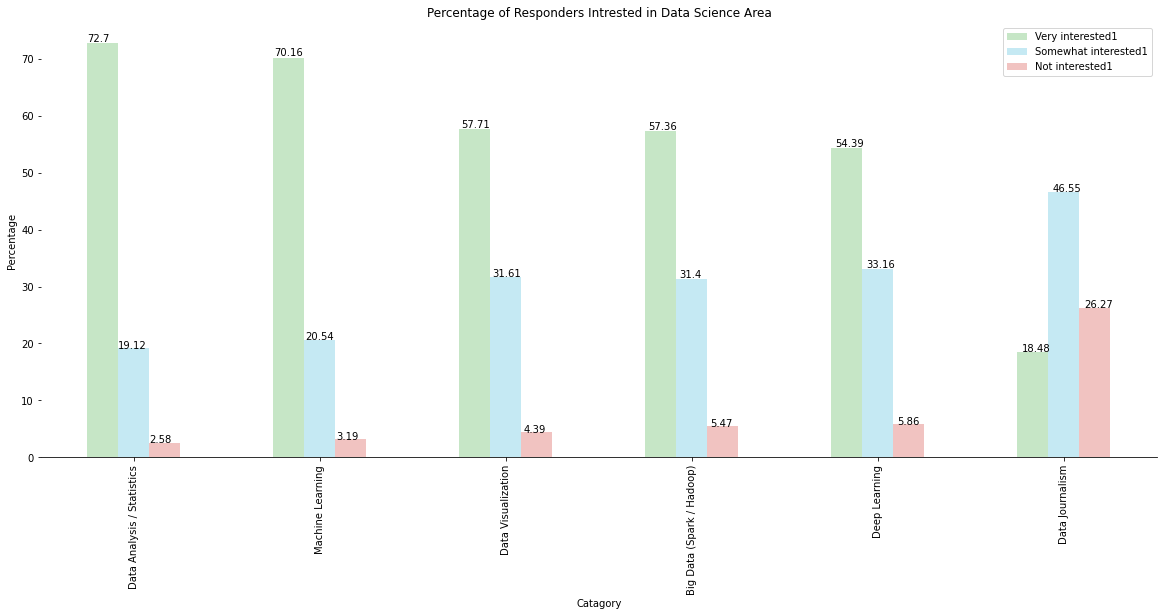

In [316]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


ax = df1.plot(kind='bar', alpha=0.35, figsize=(20, 8), color=['#5cb85c','#5bc0de','#d9534f'])

ax.set_title('Percentage of Responders Intrested in Data Science Area')
ax.set_ylabel('Percentage')
ax.set_xlabel('Catagory')
abc=df1.values.tolist()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

In [317]:
client_6ba329fd583044c5b734928040b0e5c5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='105NIPXYnkiXBJVVjEMmDd5_j3bFMjMsahkc_mXezaoF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6ba329fd583044c5b734928040b0e5c5.get_object(Bucket='genesissample-donotdelete-pr-qzmczhtl6d8khh',Key='Police_Department_Incidents_-_Previous_Year__2016_.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body)

In [319]:
df2.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [323]:
print(df2.groupby('PdDistrict'))

In [334]:
df2.groupby(["PdDistrict"])['IncidntNum'].count()


PdDistrict
BAYVIEW       14303
CENTRAL       17666
INGLESIDE     11594
MISSION       19503
NORTHERN      20100
PARK           8699
RICHMOND       8922
SOUTHERN      28445
TARAVAL       11325
TENDERLOIN     9942
Name: IncidntNum, dtype: int64

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [ ]:
import folium

In [ ]:
latitude = 37.77
longitude = -122.42

In [ ]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [ ]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df2 = df2.iloc[0:limit, :]

In [ ]:
client_6ba329fd583044c5b734928040b0e5c5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='105NIPXYnkiXBJVVjEMmDd5_j3bFMjMsahkc_mXezaoF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6ba329fd583044c5b734928040b0e5c5.get_object(Bucket='genesissample-donotdelete-pr-qzmczhtl6d8khh',Key='san-francisco.geojson')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


In [ ]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[37.77, -122.42], zoom_start=2)